<a href="https://colab.research.google.com/github/KrisrcQi/KrisrcQi/blob/Financial-information/Session5DataTools_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Visualizing the Data


In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
stock_data = yf.download('AAPL, AMZN, TSLA', start = "2023-01-01", end="2023-03-01")

In [ ]:
stock_data

Text(0.5, 0, 'Open price')

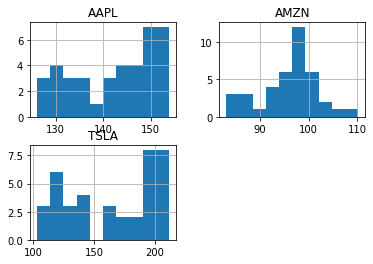

In [ ]:
stock_data['Open'].hist(histtype='bar')
plt.xlabel('Open price')

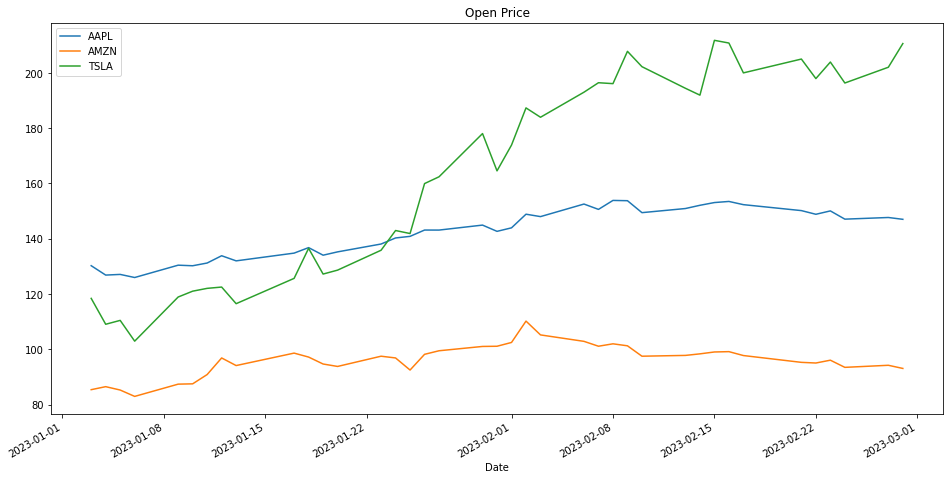

In [ ]:
stock_data['Open'].plot(label='Open',figsize=(16,8),title='Open Price')
plt.legend()

In [ ]:
#Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [ ]:
stock_data['Total Traded','AAPL'] = stock_data['Open','AAPL']*stock_data['Volume','AAPL']
stock_data['Total Traded','AMZN'] = stock_data['Open','AMZN']*stock_data['Volume','AMZN']
stock_data['Total Traded','TSLA'] = stock_data['Open','TSLA']*stock_data['Volume','TSLA']

In [ ]:
stock_data

In [ ]:
# ** Plot this "Total Traded" against the time index.**

Text(0, 0.5, 'Total Traded')

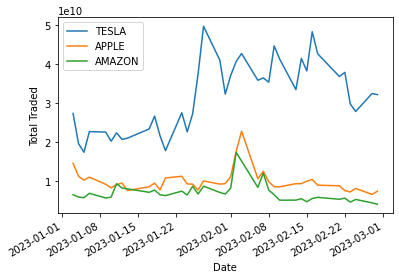

In [ ]:
stock_data['Total Traded','TSLA'].plot(label='TESLA')
stock_data['Total Traded','AAPL'].plot(label='APPLE')
stock_data['Total Traded','AMZN'].plot(label='AMAZON')
plt.legend()
plt.ylabel('Total Traded')

In [ ]:
#looks like there was huge amount of money traded for Amazon on the second day

In [ ]:
stock_data['Total Traded','AAPL'].argmax()

22

In [ ]:
for i in stock_data['Total Traded']:
  print(stock_data['Total Traded',i].argmax())
  

22
21
17


In [ ]:
#MA (Moving Averages)

In [ ]:
for i in stock_data['Close']:
  stock_data['MA5',i] = stock_data['Close', i].rolling(5).mean()
  stock_data['MA10',i] = stock_data['Close', i].rolling(10).mean()


In [ ]:
stock_data

<AxesSubplot:xlabel='Date'>

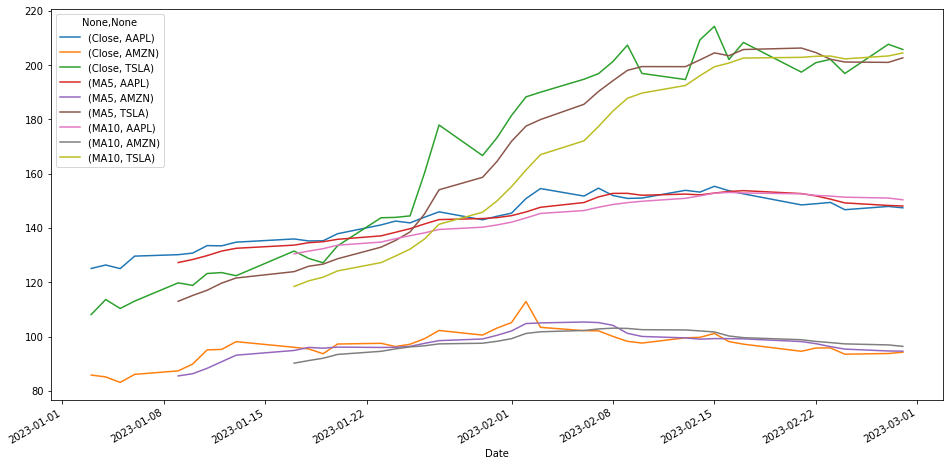

In [ ]:
stock_data[['Close','MA5','MA10']].plot(label='stock_data',figsize=(16,8))

In [ ]:
#Stock price with MA5,10,15,30 for AAPL

In [ ]:
MA_AAPL = pd.DataFrame()
ma = [5,10,15,30]
for i in ma:
  MA_AAPL['MA5',i] = stock_data['Close','AAPL'].rolling(i).mean()
MA_AAPL['Close'] = stock_data['Close','AAPL']


In [ ]:
MA_AAPL


<AxesSubplot:title={'center':'AAPL'}, xlabel='Data', ylabel='Price'>

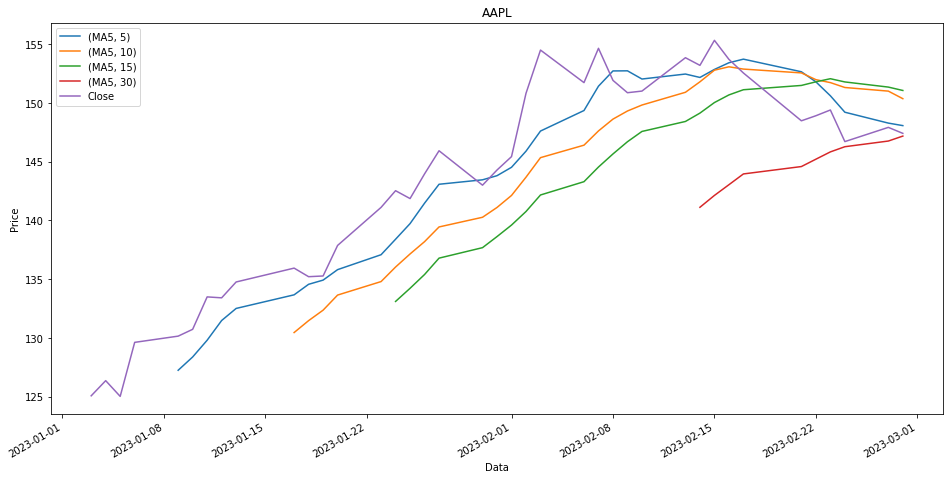

In [ ]:
MA_AAPL.plot(label = 'MA_AAPL', ylabel = 'Price', xlabel = 'Data', figsize=(16,8), title = 'AAPL')

In [ ]:
#Stock price with MA5,10,15,30 for AAPL

<AxesSubplot:title={'center':'TSLA'}, xlabel='Data', ylabel='Price'>

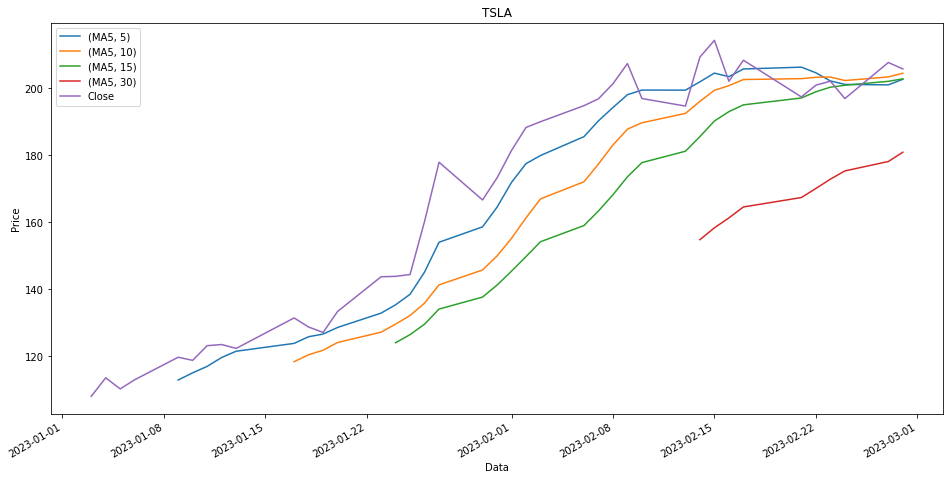

In [ ]:
MA_TSLA = pd.DataFrame()

for i in ma:
  MA_TSLA['MA5',i] = stock_data['Close','TSLA'].rolling(i).mean()
MA_TSLA['Close'] = stock_data['Close','TSLA']
MA_TSLA.plot(label = 'MA_TSLA', ylabel = 'Price', xlabel = 'Data', figsize=(16,8), title = 'TSLA')

In [ ]:
#Stock price with MA5,10,15,30 for AAPL

<AxesSubplot:title={'center':'AMZN'}, xlabel='Data', ylabel='Price'>

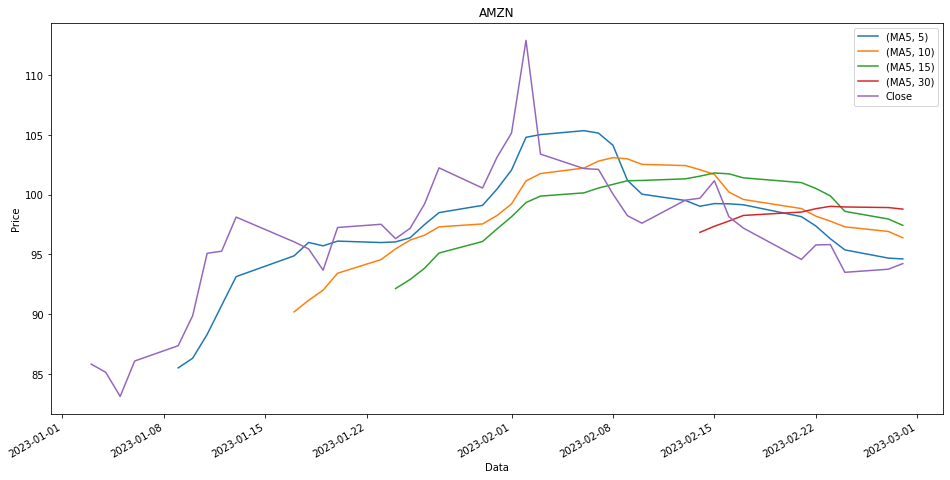

In [ ]:
MA_AMZN = pd.DataFrame()

for i in ma:
  MA_AMZN['MA5',i] = stock_data['Close','AMZN'].rolling(i).mean()
MA_AMZN['Close'] = stock_data['Close','AMZN']
MA_AMZN.plot(label = 'MA_AMZN', ylabel = 'Price', xlabel = 'Data', figsize=(16,8), title = 'AMZN')

In [ ]:
#Finally lets see if there is a relationship between these stocks
#We can see this easily through a scatter matrix plot. 
#Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. 
#You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
car_comp = pd.concat([stock_data['Open','AAPL'],stock_data['Open','AAPL'],stock_data['Open','AAPL']],axis=1)

In [ ]:
car_comp

Open                        
                  AAPL        AAPL        AAPL
Date                                          
2023-01-03  130.279999  130.279999  130.279999
2023-01-04  126.889999  126.889999  126.889999
2023-01-05  127.129997  127.129997  127.129997
2023-01-06  126.010002  126.010002  126.010002
2023-01-09  130.470001  130.470001  130.470001
2023-01-10  130.259995  130.259995  130.259995
2023-01-11  131.250000  131.250000  131.250000
2023-01-12  133.880005  133.880005  133.880005
2023-01-13  132.029999  132.029999  132.029999
2023-01-17  134.830002  134.830002  134.830002
2023-01-18  136.820007  136.820007  136.820007
2023-01-19  134.080002  134.080002  134.080002
2023-01-20  135.279999  135.279999  135.279999
2023-01-23  138.119995  138.119995  138.119995
2023-01-24  140.309998  140.309998  140.309998
2023-01-25  140.889999  140.889999  140.889999
2023-01-26  143.169998  143.169998  143.169998
2023-01-27  143.160004  143.160004  143.160004
2023-01-30  144.960007  144.960007  144.960007
2023-01-31  142.699997  142.699997  142.699997
2023-02-01  143.970001  143.970001  143.970001
2023-02-02  148.899994  148.899994  148.899994
2023-02-03  148.029999  148.029999  148.029999
2023-02-06  152.570007  152.570007  152.570007
2023-02-07  150.639999  150.639999  150.639999
2023-02-08  153.880005  153.880005  153.880005
2023-02-09  153.779999  153.779999  153.779999
2023-02-10  149.460007  149.460007  149.460007
2023-02-13  150.949997  150.949997  150.949997
2023-02-14  152.119995  152.119995  152.119995
2023-02-15  153.110001  153.110001  153.110001
2023-02-16  153.509995  153.509995  153.509995
2023-02-17  152.350006  152.350006  152.350006
2023-02-21  150.199997  150.199997  150.199997
2023-02-22  148.869995  148.869995  148.869995
2023-02-23  150.089996  150.089996  150.089996
2023-02-24  147.110001  147.110001  147.110001
2023-02-27  147.710007  147.710007  147.710007
2023-02-28  147.050003  147.050003  147.050003

In [ ]:
car_comp.columns = ['AAPL Open','TSLA Open','AMZN Open']

In [ ]:
car_comp

,AAPL Open,TSLA Open,AMZN Open
Date,,,
2023-01-03,130.279999,130.279999,130.279999
2023-01-04,126.889999,126.889999,126.889999
2023-01-05,127.129997,127.129997,127.129997
2023-01-06,126.010002,126.010002,126.010002
2023-01-09,130.470001,130.470001,130.470001
2023-01-10,130.259995,130.259995,130.259995
2023-01-11,131.250000,131.250000,131.250000
2023-01-12,133.880005,133.880005,133.880005
2023-01-13,132.029999,132.029999,132.029999


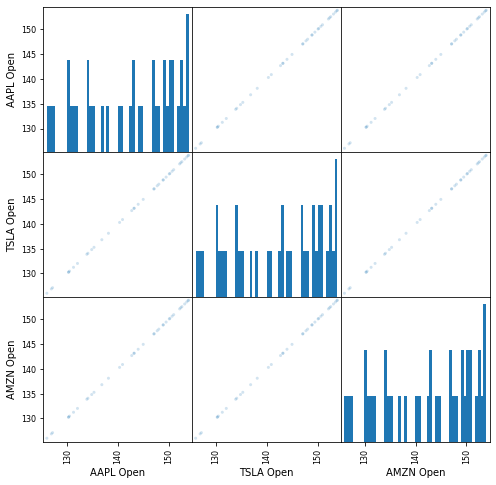

In [ ]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [ ]:
import seaborn as sns


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

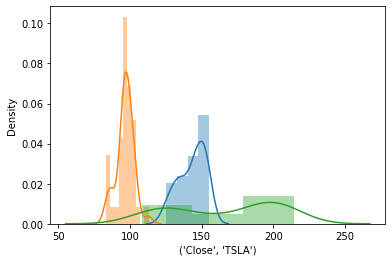

In [ ]:
sns.set_style()
for i in stock_data['Close']:
  sns.distplot(stock_data['Close',i])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

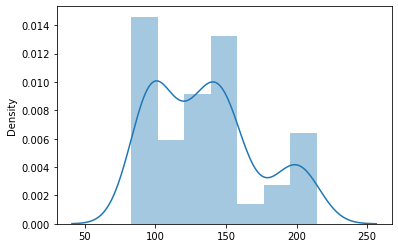

In [ ]:
sns.set_style()
sns.distplot(stock_data['Close'])

In [ ]:
MA_AAPL['Open'] = (stock_data['Open','AAPL'])
MA_AAPL

,"(MA5, 5)","(MA5, 10)","(MA5, 15)","(MA5, 30)",Close,Open
Date,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,125.070000,130.279999
2023-01-04,NaN,NaN,NaN,NaN,126.360001,126.889999
2023-01-05,NaN,NaN,NaN,NaN,125.019997,127.129997
2023-01-06,NaN,NaN,NaN,NaN,129.619995,126.010002
2023-01-09,127.243997,NaN,NaN,NaN,130.149994,130.470001
2023-01-10,128.375996,NaN,NaN,NaN,130.729996,130.259995
2023-01-11,129.801997,NaN,NaN,NaN,133.490005,131.250000
2023-01-12,131.479999,NaN,NaN,NaN,133.410004,133.880005
2023-01-13,132.507999,NaN,NaN,NaN,134.759995,132.029999


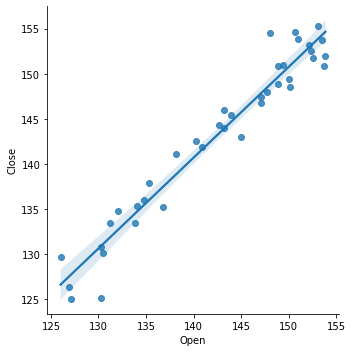

In [ ]:
sns.lmplot(x='Open',y='Close', data=MA_AAPL)

In [ ]:
sns.lmplot(x='Open',y='Close', data = stock_data)

<AxesSubplot:>

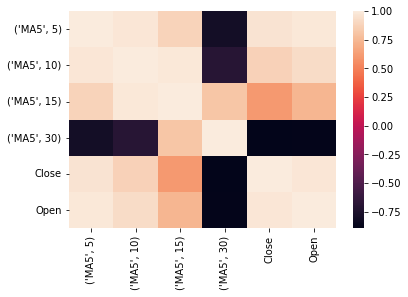

In [ ]:
corr = MA_AAPL.corr()
sns.heatmap(corr)